### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>




This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dateutil.parser import parse


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import Air Passengers data
#!file -i /content/drive/MyDrive/MLAI_Haas/data/AirPassengers.csv
air = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/AirPassengers.csv')
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#Set time index
air['Month'] = pd.to_datetime(air['Month'])
air = air.set_index('Month')
air


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#Decompose Air Passengers data
air_decomp = sm.tsa.seasonal_decompose(air, model='additive', period=12)

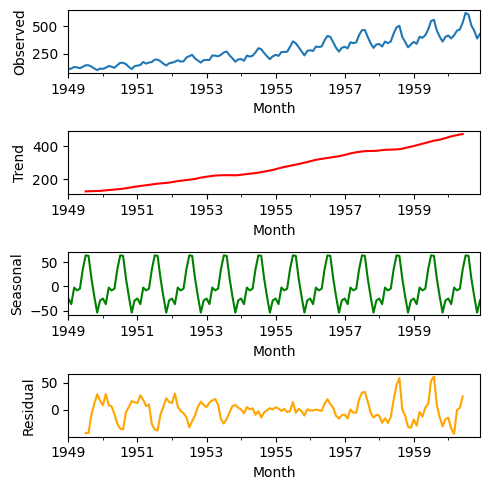

In [ ]:
# Display plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 5))

air_decomp.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

air_decomp.trend.plot(ax=ax2, color="red")
ax2.set_ylabel('Trend')

air_decomp.seasonal.plot(ax=ax3, color="green")
ax3.set_ylabel('Seasonal')

air_decomp.resid.plot(ax=ax4, color="orange")
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Import Sunspots Data
sunspots = sm.datasets.sunspots.load_pandas()
sunspots_df = sunspots.data
sunspots_df


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


<ipython-input-11-df562dafe63f>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sunspots_df['YEAR']=pd.to_datetime(sunspots_df['YEAR'],infer_datetime_format=True)


<Axes: xlabel='YEAR'>

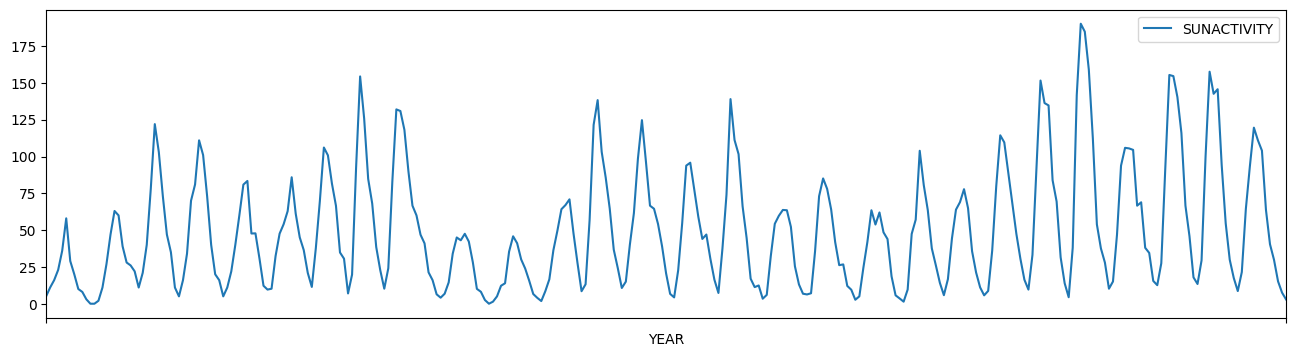

In [ ]:
#Set timestamp index
sunspots_df['YEAR']=pd.to_datetime(sunspots_df['YEAR'],infer_datetime_format=True)
sunspots_ind = sunspots_df.set_index('YEAR',inplace=False)
sunspots_ind.plot(figsize=(16,4))

In [ ]:
# Decompose sunspots data

sunspots_decomp = sm.tsa.seasonal_decompose(sunspots_ind, model='additive', period=12)

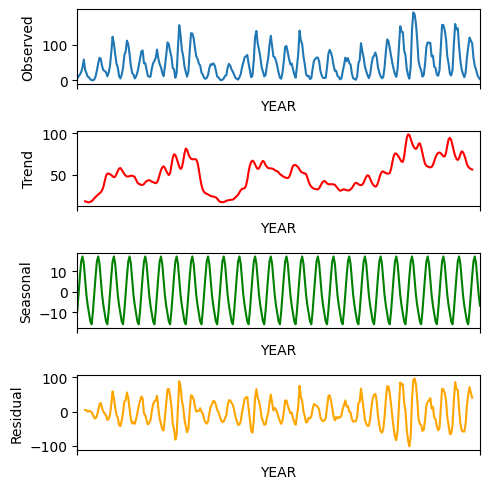

In [ ]:
# Display plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 5))

sunspots_decomp.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

sunspots_decomp.trend.plot(ax=ax2, color="red")
ax2.set_ylabel('Trend')

sunspots_decomp.seasonal.plot(ax=ax3, color="green")
ax3.set_ylabel('Seasonal')

sunspots_decomp.resid.plot(ax=ax4, color="orange")
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

**Similarities**
*   Both datasets are non-stationary and show seasonality
*   Both residual plots show random variations, meaning neither dataset has other stable underlying patterns

**Differences**
*   The Air Passengers dataset shows a growth trend of increasing values over time, while the Sunspots dataset does not have a clear trend
*   The Sunspots data seasonality pattern is symmetric in magnitude, while the Air Passengers data is not, but shows peak and and off seasons of different magnitudes

